In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification


In [5]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [7]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.423087,0.769900,0.099349,-3.330203,-0.217017,1
1,0.619472,2.818308,0.650770,1.107018,0.848944,0
2,-1.212023,-1.060135,1.302936,0.323390,-2.174049,1
3,1.902280,1.248938,1.064704,1.216984,1.100580,0
4,1.310356,0.368175,2.255932,1.326421,2.495710,0


# Function for Row Sampling

In [51]:
def row_sample(df, percent):
    return df.sample(int(percent * df.shape[0]),replace=True)

In [79]:
df1 = row_sample(df, 0.2)
df1

,col1,col2,col3,col4,col5,target
32,-0.713713,0.985799,-0.824343,1.621568,-0.140978,0
51,1.582313,2.284332,1.169819,1.291669,3.019238,0
63,0.537265,1.393210,0.230160,0.718869,-1.069697,0
61,-0.177821,3.053070,-1.415738,-2.649148,1.260493,1
86,0.810865,2.758325,1.126500,0.880787,0.412655,0
60,0.810573,-0.799712,-0.652374,1.068661,-0.141434,0
78,2.110168,2.750602,1.202643,0.806500,2.076736,0
80,-1.429372,2.656751,-2.477131,-1.641182,0.448986,1
27,0.075745,0.831395,-0.382785,0.713312,-0.868340,0
3,1.902280,1.248938,1.064704,1.216984,1.100580,0


In [83]:
df2 = row_sample(df, 0.2)
df2

,col1,col2,col3,col4,col5,target
3,1.902280,1.248938,1.064704,1.216984,1.100580,0
33,0.456302,0.682818,1.456685,0.992613,2.103103,0
97,0.537575,3.138232,1.829796,1.082574,1.725679,0
40,2.938996,1.278194,0.781809,1.175372,1.580001,0
19,-0.357121,1.936623,-1.352258,-0.725916,-0.527819,1
85,-0.975847,1.204515,0.272833,-0.258095,-0.010716,1
24,0.427058,2.649453,0.758498,1.633842,2.367937,0
88,-1.067516,-1.287620,1.150014,0.679933,-2.738066,1
95,-2.280045,0.253928,0.641301,0.477028,-0.412398,1
82,1.449708,-0.482932,2.263293,1.064566,2.905447,0


In [85]:
df3 = row_sample(df, 0.2)
df3

,col1,col2,col3,col4,col5,target
23,-1.044515,2.426269,-2.689798,-1.572020,-0.293634,1
19,-0.357121,1.936623,-1.352258,-0.725916,-0.527819,1
48,-1.184455,0.550488,0.945474,1.945154,3.303958,0
16,-0.876203,0.912506,0.591377,1.865834,-0.765366,1
20,0.999789,1.952131,1.173333,1.406485,2.783188,0
39,-0.784805,-0.452718,1.033946,0.966938,-0.104552,0
8,-1.284707,1.490693,-1.605030,0.361525,-1.061733,1
98,2.061023,4.036015,-0.601777,1.440271,1.186549,0
50,-2.645191,1.142016,-2.213168,-0.196714,-0.891733,1
33,0.456302,0.682818,1.456685,0.992613,2.103103,0


In [87]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [89]:
clf1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [71]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[3] <= 0.709\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

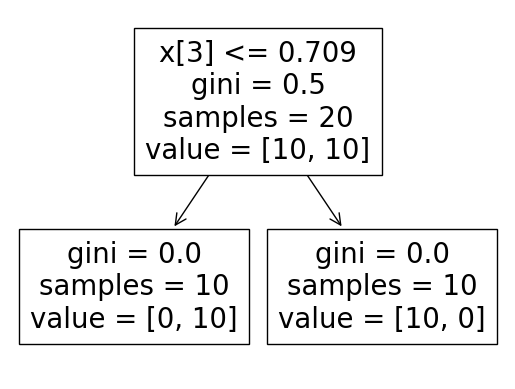

In [91]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= 0.697\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

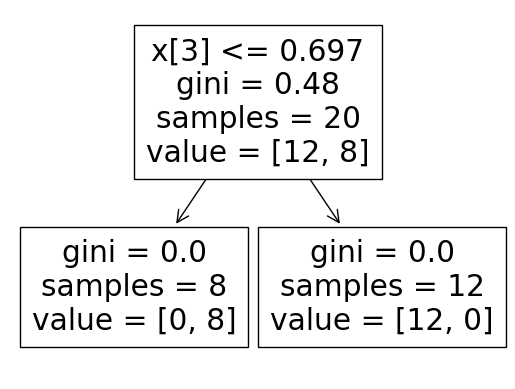

In [93]:
plot_tree(clf2)

[Text(0.4, 0.875, 'x[3] <= 0.378\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.625, 'x[0] <= -0.831\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.4, 0.375, 'x[2] <= 0.768\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

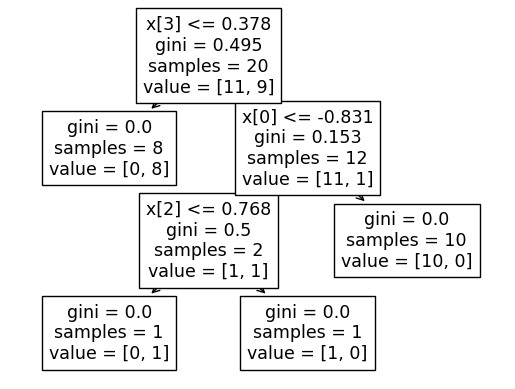

In [95]:
plot_tree(clf3)

In [105]:
clf1.predict(np.array([-0.177821,	3.053070,	-1.415738,	-2.649148,	1.260493]).reshape(1,5))

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [107]:
clf2.predict(np.array([-0.177821,	3.053070,	-1.415738,	-2.649148,	1.260493]).reshape(1,5))

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [109]:
clf3.predict(np.array([-0.177821,	3.053070,	-1.415738,	-2.649148,	1.260493]).reshape(1,5))

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])